<font size="4">**Sequential**</font>

In [8]:
import random

def count_pi(n):
    count = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if (pow(x, 2) + pow(y, 2)) <= 1:
            count += 1
    pi = 4 * (count / n)
    return pi

In [9]:
%%time
pi = count_pi(10_000_000_000)
print(pi)

3.1415762696
CPU times: user 38min 49s, sys: 27.9 s, total: 39min 17s
Wall time: 39min 27s


<font size="4">**Parallel**</font>

In [1]:
import dask
from dask.distributed import Client
import random

client = Client(n_workers=4)

@dask.delayed
def count_pi(n):
    count = 0
    for i in range(n):  
        x = random.random()
        y = random.random()
        if (pow(x, 2) + pow(y, 2)) <= 1:
            count += 1
    return count  

@dask.delayed
def summary(counts, n_total):
    return 4 * sum(counts) / n_total 

In [2]:
n_total = 10_000_000_000  
num_subtasks = 4
n_per_task = n_total // num_subtasks 

counts = []
for i in range(num_subtasks):
    task = count_pi(n_per_task)
    counts.append(task)

In [3]:
%%time

pi_1 = summary(counts, n_total)
print(pi_1)
pi_1.compute()

Delayed('summary-789000f2-c0a5-4be9-84ae-dc6aa85741b1')
CPU times: user 39.4 s, sys: 9.62 s, total: 49 s
Wall time: 17min 7s


3.1415738272

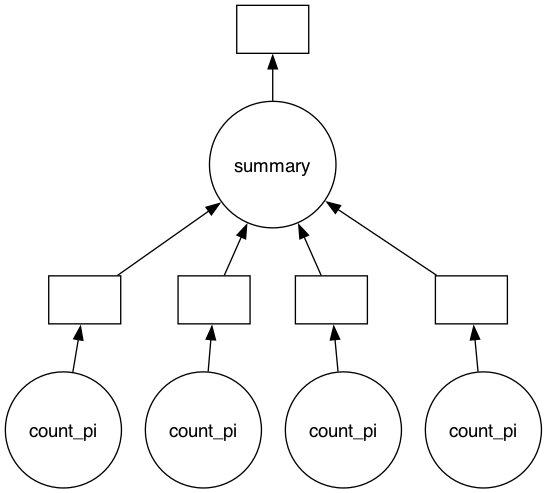

In [4]:
pi_1.visualize()

In [5]:
n_total = 10_000_000_000  
num_subtasks = 10_000
n_per_task = n_total // num_subtasks 

counts = []
for i in range(num_subtasks):
    task = count_pi(n_per_task)
    counts.append(task)

if n_total % num_subtasks != 0:
    remaining = n_total % num_subtasks
    counts.append(count_pi(remaining))

In [6]:
%%time

pi_2 = summary(counts, n_total)
print(pi_2)
pi_2.compute()

Delayed('summary-c148742b-3259-4d85-96bf-64865ca07a20')
CPU times: user 55.7 s, sys: 11.5 s, total: 1min 7s
Wall time: 18min 29s


3.1415761444

In [7]:
pi_2.visualize()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0234052 to fit
